# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]
print("Duplicate Mice:")
display(duplicates["Mouse ID"].unique())


Duplicate Mice:


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]
print("Data for duplicate mouse ID:")
duplicate_mouse_data.head()

Data for duplicate mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove all data associated with mouse ID 'g989'
clean_df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice}")


Number of mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns 
summary_stats = summary_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume",
                                              "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.",
                                              "sem": "Tumor Volume Std. Err."})

# Print the summary statistics table
print("Summary statistics for tumor volume by drug regimen:")
display(summary_stats)


Summary statistics for tumor volume by drug regimen:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats2 = clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Std. Dev.', 'sem': 'Std. Err.'})

summary_stats2

Tumor Volume (mm3)                                          
                           Mean     Median   Variance Std. Dev. Std. Err.
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

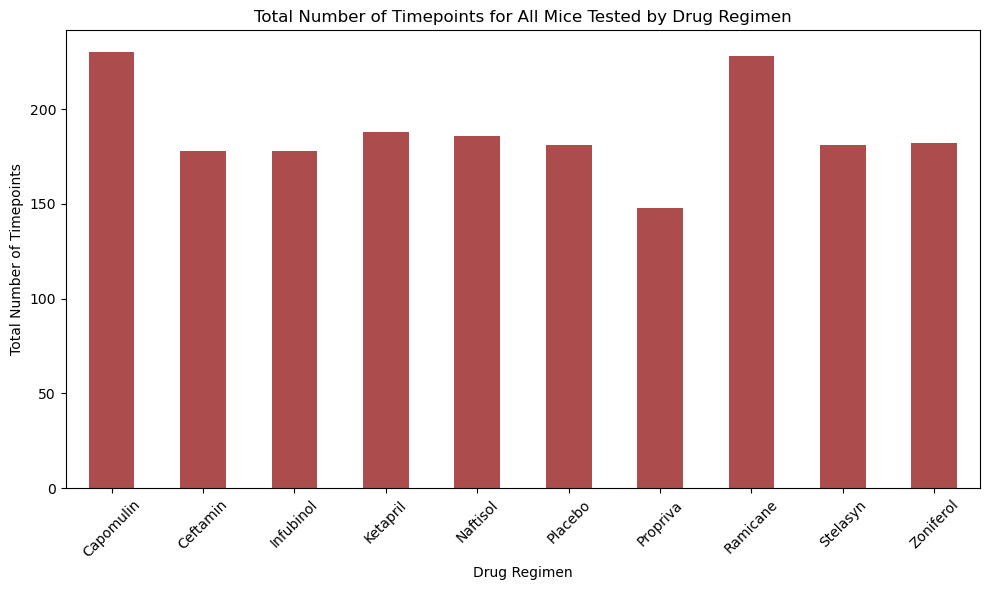

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint_counts.plot(kind="bar", figsize=(10,6), rot=45, alpha=0.7, color='darkred')
plt.title("Total Number of Timepoints for All Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.tight_layout()
plt.show()



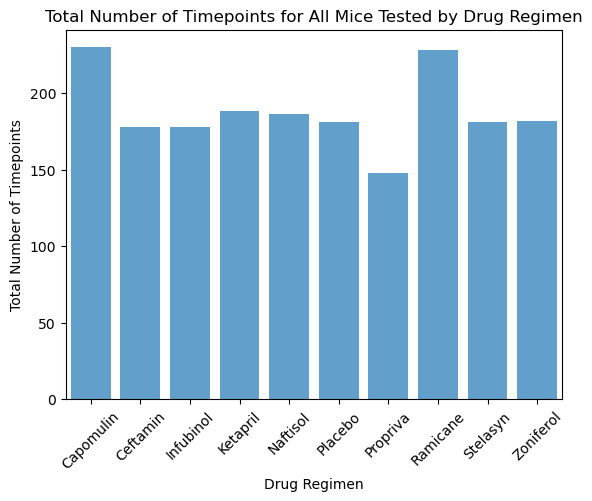

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the clean_df DataFrame by "Drug Regimen" and "Timepoint", and count the number of unique Mouse IDs for each group
timepoint_counts = clean_df.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].nunique()

# Sum the number of timepoints for each drug regimen
regimen_counts = timepoint_counts.groupby(["Drug Regimen"]).sum()

# Get the list of drug regimen names and corresponding timepoint counts
regimen_names = regimen_counts.index.tolist()
timepoint_values = regimen_counts.values.tolist()

# Use pyplot's bar function to generate a bar plot of the timepoint counts for each drug regimen
plt.bar(regimen_names, timepoint_values, alpha=0.7,align="center")

# Set the x-axis tick labels to the drug regimen names
plt.xticks(regimen_names, rotation=45)

# Set the plot title and axis labels
plt.title("Total Number of Timepoints for All Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# Set the x-axis and y-axis limits
plt.xlim(-0.5, len(regimen_names)-0.5)
plt.ylim(0, max(timepoint_values)*1.05)

# Display the plot
plt.show()


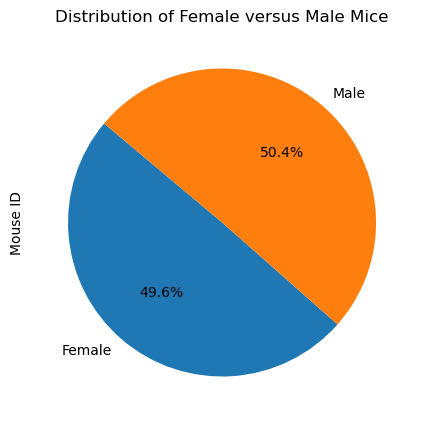

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the clean_df DataFrame by "Sex" and count the number of unique Mouse IDs for each group
sex_counts = clean_df.groupby(["Sex"])["Mouse ID"].nunique()

# Use Pandas' plot function to generate a pie chart of the sex counts
sex_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%", startangle=140 ,legend=False, figsize=(5,5))

# Set the plot title
plt.title("Distribution of Female versus Male Mice")

# Display the plot
plt.show()


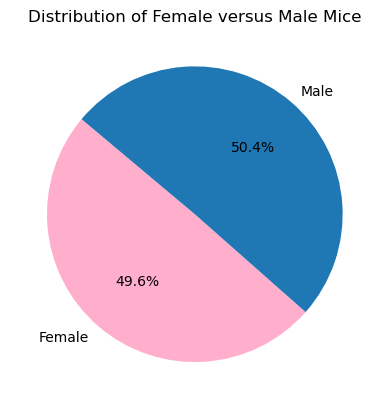

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the clean_df DataFrame by "Sex" and count the number of unique Mouse IDs for each group
sex_counts = clean_df.groupby(["Sex"])["Mouse ID"].nunique()

# Define the labels and colors for the pie chart
labels = sex_counts.index.tolist()
colors = ["#ffafcc", "#1f77b4"]

# Use pyplot's pie function to generate a pie chart of the sex counts
plt.pie(sex_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)

# Set the plot title
plt.title("Distribution of Female versus Male Mice")

# Display the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#___________________________________________
# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the clean_df DataFrame to only include data for the four treatments
treatments_df = clean_df[clean_df["Drug Regimen"].isin(treatments)]

# Group the treatments_df DataFrame by "Mouse ID" and get the maximum "Timepoint" for each group
last_timepoint = treatments_df.groupby("Mouse ID")["Timepoint"].max()

# Merge the last_timepoint Series with the treatments_df DataFrame on both "Mouse ID" and "Timepoint"
merged_df = pd.merge(treatments_df, last_timepoint, on=["Mouse ID", "Timepoint"])

# Create a DataFrame that only includes the "Mouse ID", "Drug Regimen", and "Tumor Volume (mm3)" columns
final_tumor_volume = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

# Display the first 5 rows of the final_tumor_volume DataFrame
final_tumor_volume.head()


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determineoutliers using upper and lower bounds
#______________________________________________________________    
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[(merged_df['Drug Regimen'] == treatment) & (merged_df['Timepoint'] == 45), 'Tumor Volume (mm3)']
    
    # Add subset to tumor_volumes list
    tumor_volumes.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Check for any potential outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}: {outliers}")


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Create a list of the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume data for each treatment regimen
tumor_vols = [df.loc[df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Define the outlier marker style
outlier_marker = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', markeredgecolor='black')

# Create the box plot using pyplot
fig, ax = plt.subplots()
ax.boxplot(tumor_vols, labels=treatments, flierprops=outlier_marker)

# Set the axis labels and title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume for Each Treatment Regimen')

# Display the plot
plt.show()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# First, select a mouse that was treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title(f'Tumor volume over time for mouse {mouse_id} treated with Capomulin')

# Show the plot
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the data to keep only Capomulin regimen
capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='#01d384', edgecolors='black', s=mouse_weight*1)

# Set the x-axis and y-axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [ ]:
# Select the Capomulin regimen from the clean DataFrame
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse on the Capomulin regimen
capomulin_avg = capomulin_df.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)

# Calculate the correlation coefficient
correlation = st.pearsonr(x_values, y_values)[0]
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation,2)}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add the regression line to the scatter plot
plt.plot(x_values, regress_values, "r-")

# Label the scatter plot and show it
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()
